# Spectrum Audio Display - Simulation

This notebook is used to simulate signal path from source (microphone) to amplifier.

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from math import pi
plt.rcParams['figure.figsize'] = [15, 12]

Uin = 0.88 #Microphone RMS
Rin = 50

w_min = 30 * 2 * pi
w_max = 19999 * 2 * pi

def gen_w_array(min_w=125, max_w=125664, steps=100):
  exp_a = min_w
  exp_b = (max_w/exp_a)**(1/(steps-1))

  w = exp_a*exp_b**np.arange(0,steps)
  return w

w_draw = gen_w_array(0.01, w_max*2, 200)

C1 = 1e-6
R1 = 10e3

ZC1 = -1j/(w_draw*C1)

print(f"Cutoff angular frequency {1.0/(R1*C1)} rad/s")

# open circuit voltage
U1_th_Rin = Uin*R1/(Rin+R1+ZC1)
# short circuit current
I1_th_Rin = Uin/(Rin+ZC1)
# shorten voltage source, equivalent ressistance
R1_th_Rin = U1_th_Rin/I1_th_Rin

# open circuit voltage
U1_th_NoRin = Uin*R1/(R1+ZC1)
# short circuit current
I1_th_NoRin = Uin/(ZC1)
# shorten voltage source, equivalent ressistance
R1_th_NoRin = U1_th_NoRin/I1_th_NoRin



Cutoff frequency 100.0 rad/s


## Capacitor reactance

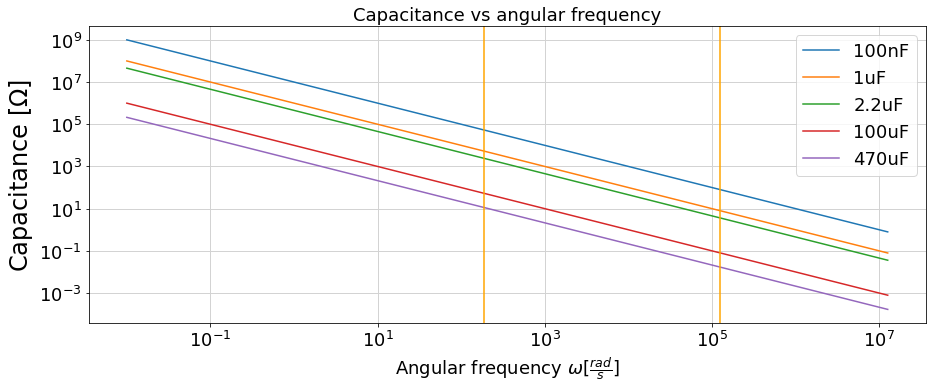

In [40]:
C_values = [100e-9, 1e-6, 2.2e-6, 100e-6, 470e-6]
C_labels = ['100nF', '1uF', '2.2uF', '100uF', '470uF']
lines = []

plt.subplot(2, 1, 2)
plt.xscale("log")
plt.yscale("log")
for C_v in C_values:
  XC = 1/(w_draw * C_v)
  lines_c, = plt.plot(w_draw, XC)
  lines.append(lines_c)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'Capacitance [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend(lines, C_labels, fontsize=18)
plt.title("Capacitance vs angular frequency", fontsize=18)

plt.show()

## Stage 1 - Output voltage

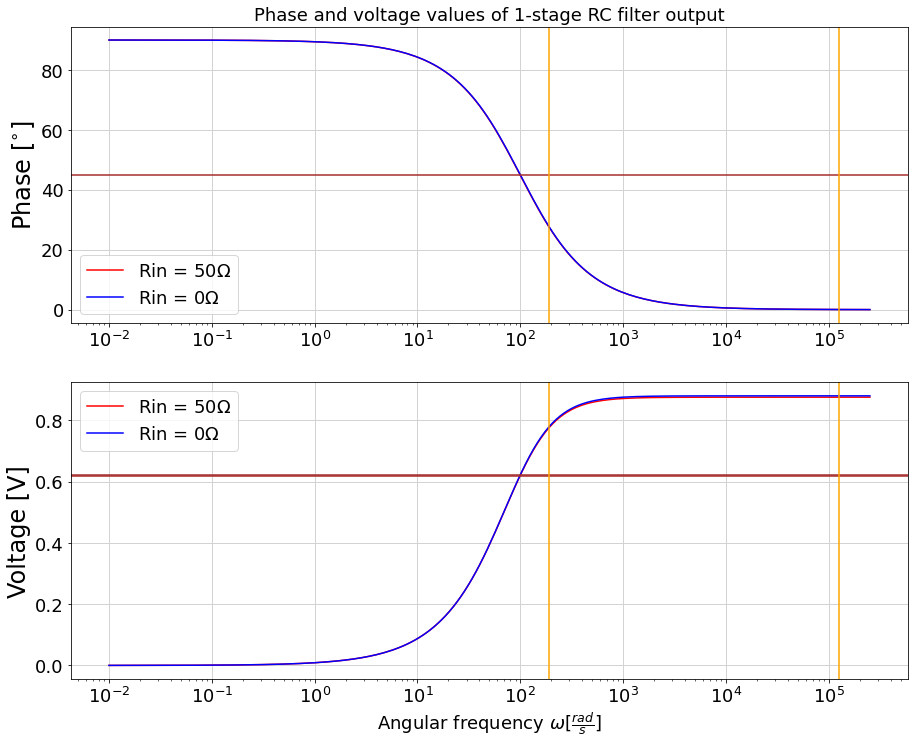

In [27]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_rin, = plt.plot(w_draw, np.angle(U1_th_Rin) * 180 / pi, 'r')
lines_norin, = plt.plot(w_draw, np.angle(U1_th_NoRin) * 180 / pi, 'b')
plt.axhline(y=45, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_rin, lines_norin], [f"Rin = {Rin}" + r"$\Omega$", f"Rin = 0" + r"$\Omega$"], fontsize=18)
plt.title("Phase and voltage values of 1-stage RC filter output", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
lines_rin, = plt.plot(w_draw, np.absolute(U1_th_Rin), 'r')
lines_norin, = plt.plot(w_draw, np.absolute(U1_th_NoRin), 'b')
plt.axhline(y=np.max(U1_th_Rin.real)*2**-0.5, c="brown")
plt.axhline(y=np.max(U1_th_NoRin.real)*2**-0.5, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'Voltage [V]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_rin, lines_norin], [f"Rin = {Rin}" + r"$\Omega$", f"Rin = 0" + r"$\Omega$"], fontsize=18)

plt.show()

## Stage 1 - Output impedance

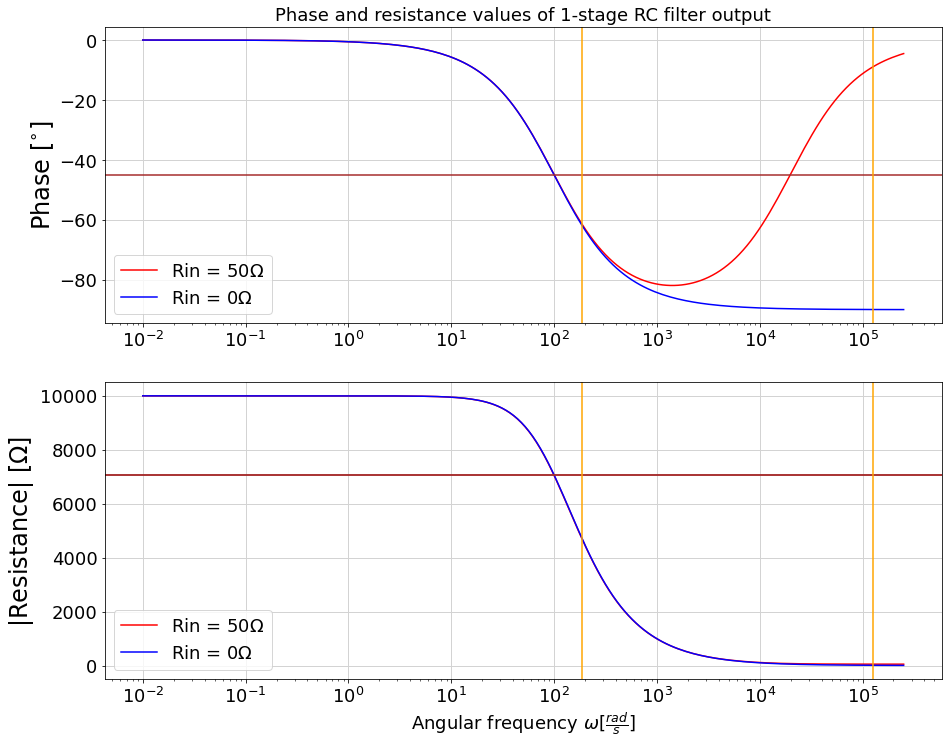

In [28]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_rin, = plt.plot(w_draw, np.angle(R1_th_Rin) * 180 / pi, 'r')
lines_norin, = plt.plot(w_draw, np.angle(R1_th_NoRin) * 180 / pi, 'b')
plt.axhline(y=-45, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_rin, lines_norin], [f"Rin = {Rin}" + r"$\Omega$", f"Rin = 0" + r"$\Omega$"], fontsize=18)
plt.title("Phase and resistance values of 1-stage RC filter output", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
lines_rin, = plt.plot(w_draw, np.absolute(R1_th_Rin), 'r')
lines_norin, = plt.plot(w_draw, np.absolute(R1_th_NoRin), 'b')
plt.axhline(y=np.max(R1_th_Rin.real)*2**-0.5, c="brown")
plt.axhline(y=np.max(R1_th_NoRin.real)*2**-0.5, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'|Resistance| [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_rin, lines_norin], [f"Rin = {Rin}" + r"$\Omega$", f"Rin = 0" + r"$\Omega$"], fontsize=18)

plt.show()

# Stage 2

In [29]:
#From previous stage equivalent Thevenins circuit:
Usrc = U1_th_Rin
Rsrc = R1_th_Rin

R2 = 1000
R3 = 1000
R23 = R2*R3/(R2+R3)
R4 = 100e3
P1 = 10e3

# C2 = 1e-6
C2 = 1e-6
ZC2 = -1j/(w_draw*C2)
R5 = 470e3
R6 = 470e3
R56 = R5*R6/(R5+R6)



## Stage - 2 - kP1 high

In [30]:
kP1low = 10/100
R234P1up_low = R23 + R4 + P1 * (1.0 - kP1low)
P1down_low = P1 * kP1low
Rd56Zc2 = P1down_low * (R56 + ZC2) / (R56 + ZC2 + P1down_low)

U2_th_kP1low = Usrc * Rd56Zc2 / (Rd56Zc2 + R234P1up_low + Rsrc)

# equivalent values
Uout_th_kP1low = U2_th_kP1low * R56 / (ZC2 + R56)
Rout_th_kP1low = (Rsrc + R234P1up_low) * Rd56Zc2 / (Rsrc + R234P1up_low + Rd56Zc2)

## Stage - 2 - kP1 low

In [31]:
kP1high = 90/100
R234P1up_high = R23 + R4 + P1 * (1.0 - kP1high)
P1down_high = P1 * kP1high
Rd56Zc2 = P1down_high * (R56 + ZC2) / (R56 + ZC2 + P1down_high)

U2_th_kP1high = Usrc * Rd56Zc2 / (Rd56Zc2 + R234P1up_high + Rsrc)

# equivalent values
Uout_th_kP1high = U2_th_kP1high * R56 / (ZC2 + R56)
Rout_th_kP1high = (Rsrc + R234P1up_high) * Rd56Zc2 / (Rsrc + R234P1up_high + Rd56Zc2)

## Stage - 2 - output voltage

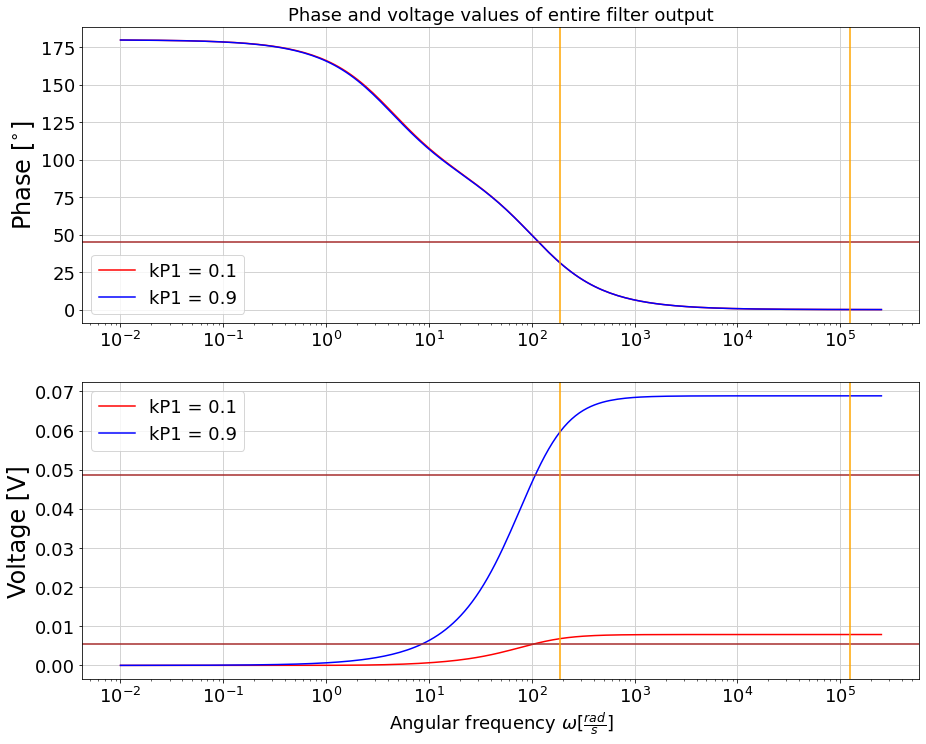

In [32]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_kP1low, = plt.plot(w_draw, np.angle(Uout_th_kP1low) * 180 / pi, 'r')
lines_kP1high, = plt.plot(w_draw, np.angle(Uout_th_kP1high) * 180 / pi, 'b')
plt.axhline(y=45, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low, lines_kP1high], [f"kP1 = {kP1low}", f"kP1 = {kP1high}"], fontsize=18)
plt.title("Phase and voltage values of entire filter output", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
lines_kP1low, = plt.plot(w_draw, np.absolute(Uout_th_kP1low), 'r')
lines_kP1high, = plt.plot(w_draw, np.absolute(U2_th_kP1high), 'b')
plt.axhline(y=np.max(Uout_th_kP1low.real)*2**-0.5, c="brown")
plt.axhline(y=np.max(U2_th_kP1high.real)*2**-0.5, c="brown")
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'Voltage [V]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low, lines_kP1high], [f"kP1 = {kP1low}", f"kP1 = {kP1high}"], fontsize=18)

plt.show()

## Stage - 2 - impedance - kP1 low

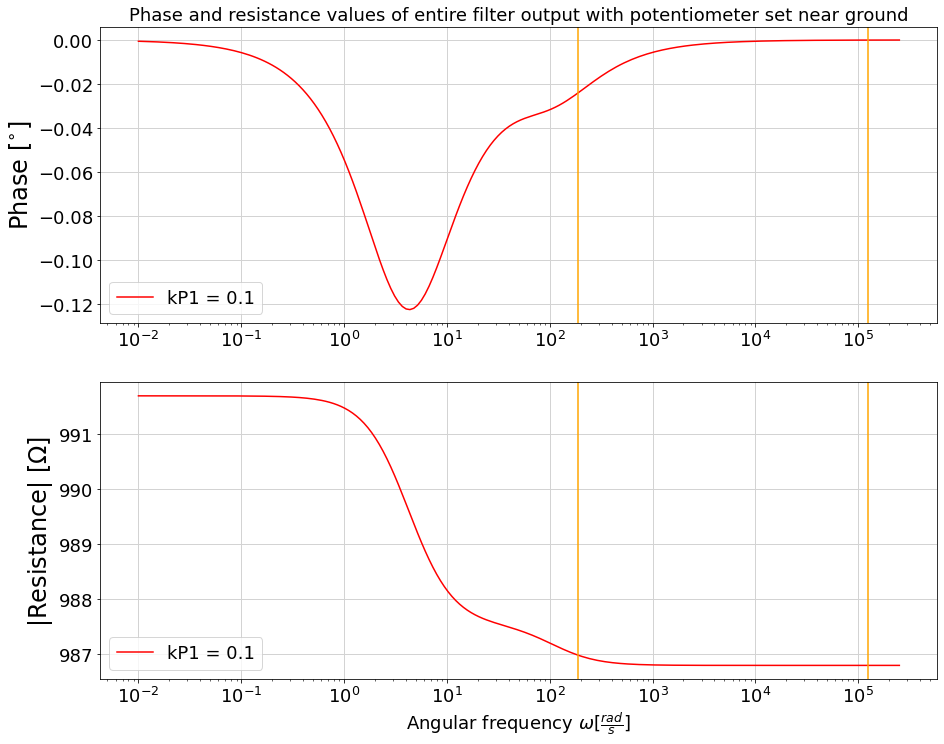

In [33]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_kP1low, = plt.plot(w_draw, np.angle(Rout_th_kP1low) * 180 / pi, 'r')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low], [f"kP1 = {kP1low}"], fontsize=18)
plt.title("Phase and resistance values of entire filter output with potentiometer set near ground", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
lines_kP1low, = plt.plot(w_draw, np.absolute(Rout_th_kP1low), 'r')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'|Resistance| [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low], [f"kP1 = {kP1low}"], fontsize=18)

plt.show()

## Stage - 2 - impedance - kP1 high


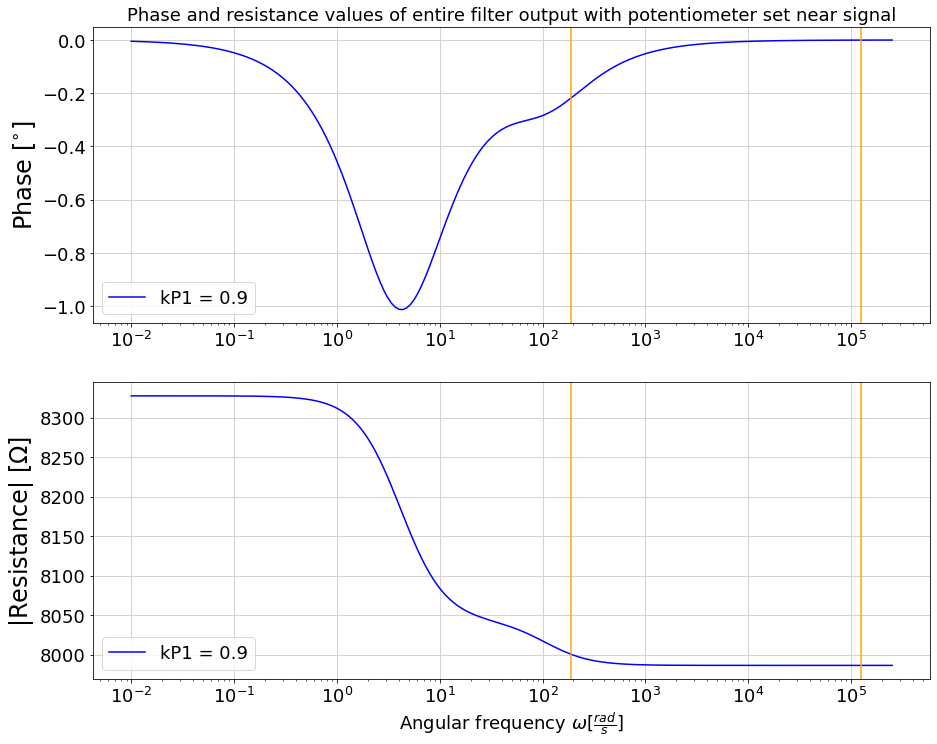

In [34]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_kP1high, = plt.plot(w_draw, np.angle(Rout_th_kP1high) * 180 / pi, 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1high], [f"kP1 = {kP1high}"], fontsize=18)
plt.title("Phase and resistance values of entire filter output with potentiometer set near signal", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
lines_kP1high, = plt.plot(w_draw, np.absolute(Rout_th_kP1high), 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'|Resistance| [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1high], [f"kP1 = {kP1high}"], fontsize=18)

plt.show()

## Stage - 2 - impedance - comparison

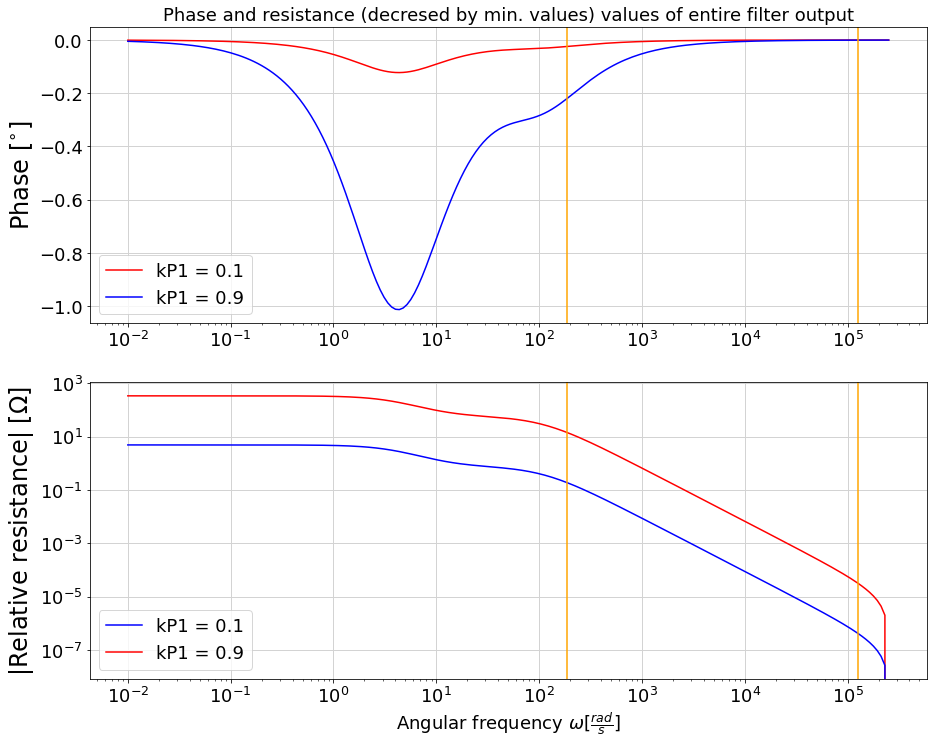

In [35]:
plt.subplot(2, 1, 1)
plt.xscale("log")
lines_kP1low, = plt.plot(w_draw, np.angle(Rout_th_kP1low) * 180 / pi, 'r')
lines_kP1high, = plt.plot(w_draw, np.angle(Rout_th_kP1high) * 180 / pi, 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low, lines_kP1high], [f"kP1 = {kP1low}", f"kP1 = {kP1high}"], fontsize=18)
plt.title("Phase and resistance (decresed by min. values) values of entire filter output", fontsize=18)


# plt.axhline(y=np.max(R1_th_NoRin)*2**-0.5, c="brown")
max_kP1low = np.max(np.absolute(Rout_th_kP1low))
min_kP1low = np.min(np.absolute(Rout_th_kP1low))
max_kP1high = np.max(np.absolute(Rout_th_kP1high))
min_kP1high = np.min(np.absolute(Rout_th_kP1high))


plt.subplot(2, 1, 2)
plt.xscale("log")
plt.yscale("log")
lines_kP1high, = plt.plot(w_draw, (np.absolute(Rout_th_kP1high)-min_kP1high) , 'r')
lines_kP1low, = plt.plot(w_draw, (np.absolute(Rout_th_kP1low)-min_kP1low) , 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'|Relative resistance| [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.legend([lines_kP1low, lines_kP1high], [f"kP1 = {kP1low}", f"kP1 = {kP1high}"], fontsize=18)

plt.show()

# Amplifier output

Input of amplifier: amplitude 0.1 (0.07 Vrms), 2.5V DC offset.
Output of amplifier: amplitude 2.5 V, 2.5V DC offset.
Input of ADC: 3.3 V range. 1.55 DC offset, amplitude 1.55 V



In [36]:
TDA_C1 = 100e-6
# TDA_C2 = 100e-9
# TDA_R1 = 4.7
TDA_R2 = 10e3
TDA_R3 = 10e3
TDA_R23 = TDA_R2*TDA_R3/(TDA_R2+TDA_R3)
print(f"Cutoff freq: {2*pi/(TDA_C1*TDA_R23)} Hz")

w_draw = gen_w_array(0.01, w_max*100, 200)

TDA_ZC1 = -1j/(w_draw*TDA_C1)
# TDA_ZC2 = -1j/(w_draw*TDA_C2)

# DC is removed
# TDA_Zparralel = (TDA_ZC2 + TDA_R1) * TDA_R23 / (TDA_ZC2 + TDA_R1 + TDA_R23)
# TDA_filter_gain = TDA_Zparralel / (TDA_ZC1 + TDA_Zparralel)
# TDA_filter_impedance = TDA_Zparralel * TDA_ZC1 / (TDA_Zparralel + TDA_ZC1)
TDA_filter_gain = TDA_R23 / (TDA_ZC1 + TDA_R23)
TDA_filter_impedance = TDA_ZC1 * TDA_R23 / (TDA_ZC1 + TDA_R23)


Cutoff freq: 12.566370614359172 Hz


## Parallel impidance

In [37]:
# TDA_Z_RC = TDA_ZC2 + TDA_R1

# plt.xscale("log")
# plt.xlim([7, 1e7])
# plt.ylim([0, TDA_R23*3])
# plt.plot(w_draw, np.absolute(TDA_Z_RC), 'b')
# plt.plot(w_draw, TDA_R23 * w_draw/w_draw, 'r')
# plt.plot(w_draw, TDA_Zparralel, 'g')
# plt.xticks(fontsize= 18)
# plt.yticks(fontsize= 18)
# plt.grid(color='lightgray', linestyle='-', linewidth=1)
# plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
# plt.ylabel(r'|Resistance| [$\Omega$]', fontsize=24)
# plt.axvline(x=w_min, c="orange")
# plt.axvline(x=w_max, c="orange")

# plt.show()


## Amplifier output voltage gain [V/V]

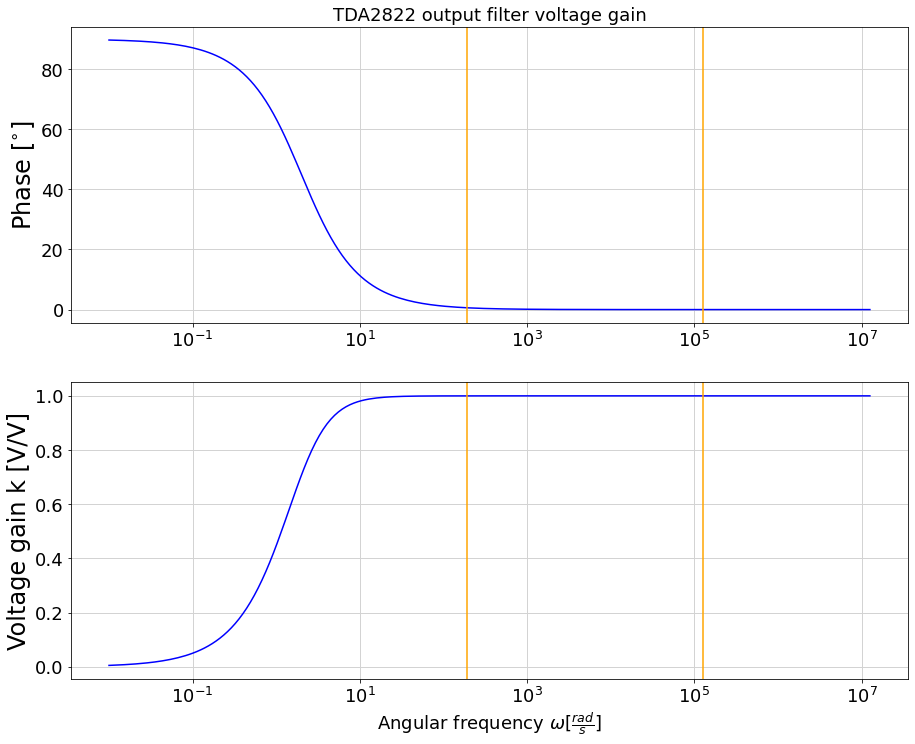

In [38]:
plt.subplot(2, 1, 1)
plt.xscale("log")
plt.plot(w_draw, np.angle(TDA_filter_gain) * 180 / pi, 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.title("TDA2822 output filter voltage gain", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
plt.plot(w_draw, np.absolute(TDA_filter_gain), 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'Voltage gain k [V/V]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")

plt.show()

## Amplifier output impedance

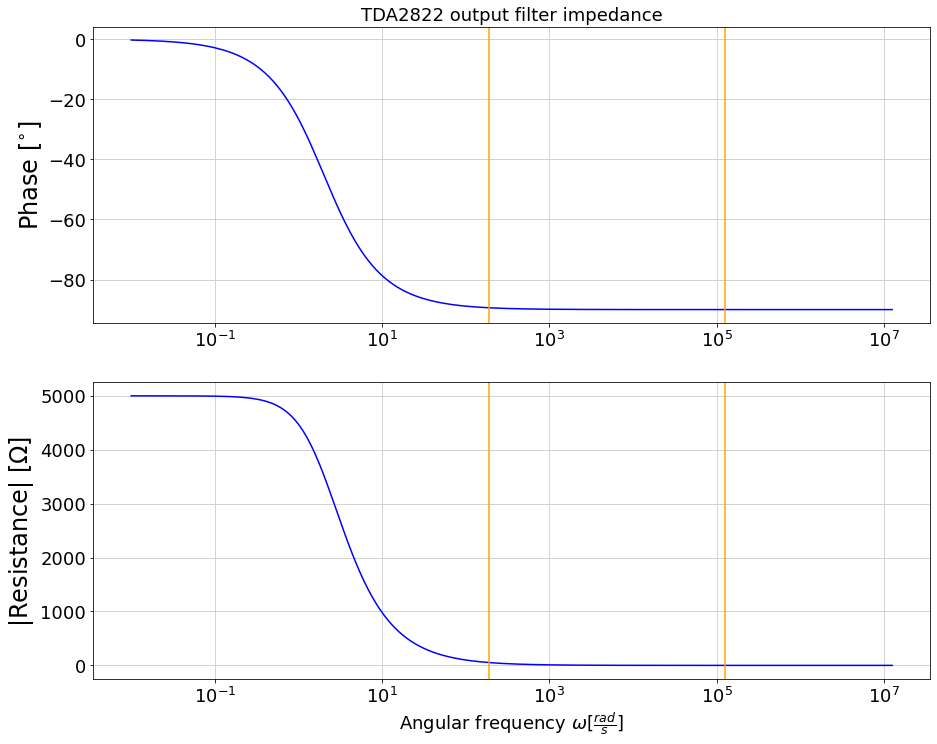

In [39]:
plt.subplot(2, 1, 1)
plt.xscale("log")
plt.plot(w_draw, np.angle(TDA_filter_impedance) * 180 / pi, 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.ylabel(r'Phase [$^{\circ}$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")
plt.title("TDA2822 output filter impedance", fontsize=18)

plt.subplot(2, 1, 2)
plt.xscale("log")
plt.plot(w_draw, np.absolute(TDA_filter_impedance), 'b')
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.xlabel("Angular frequency " + r'$\omega [\frac{rad}{s}]$', fontsize=18)
plt.ylabel(r'|Resistance| [$\Omega$]', fontsize=24)
plt.axvline(x=w_min, c="orange")
plt.axvline(x=w_max, c="orange")

plt.show()